In [1]:
import pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor

In [4]:
data_nyc = pd.read_csv("http://data.insideairbnb.com/united-states/ny/new-york-city/2021-12-04/visualisations/listings.csv")

C:\Users\natte\AppData\Local\Temp\ipykernel_20236\2004576625.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  data_nyc = pd.read_csv("http://data.insideairbnb.com/united-states/ny/new-york-city/2021-12-04/visualisations/listings.csv")


In [5]:
data_nyc.drop_duplicates(inplace=True)
data_nyc.drop(['name', 'id', 'host_name', 'host_id', 'last_review', 'license'], axis=1, inplace=True)
data_nyc.fillna({'reviews_per_month': 0}, inplace=True)
data_nyc.dropna(how='any', inplace=True)

In [8]:
data_nyc.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,38277.000000,38277.000000,38277.000000,38277.000000,38277.000000,38277.000000,38277.000000,38277.000000,38277.000000
mean,40.729206,-73.948967,170.858714,21.623769,23.302871,1.293698,17.747655,134.290984,5.032160
std,0.055752,0.050759,305.100271,29.573333,50.415484,3.886459,59.150451,143.196175,14.693768
min,40.504560,-74.249840,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,40.689260,-73.983270,70.000000,3.000000,1.000000,0.010000,1.000000,0.000000,0.000000
50%,40.725180,-73.954770,114.000000,30.000000,4.000000,0.200000,1.000000,73.000000,0.000000
75%,40.762680,-73.930430,189.000000,30.000000,20.000000,1.140000,3.000000,302.000000,3.000000
max,40.914020,-73.710870,10000.000000,1250.000000,1009.000000,141.000000,421.000000,365.000000,669.000000


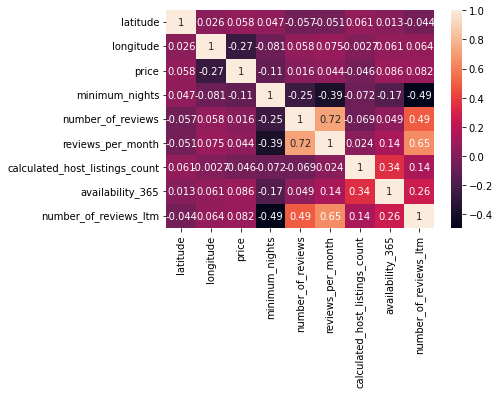

In [7]:
# Summary Statistics of Continuous Variables
corr = data_nyc.corr(method="kendall")
sns.heatmap(corr, annot=True)
plt.show()

In [9]:
data_nyc_encoded = data_nyc.copy()
data_nyc_encoded.drop(
    ['latitude', 'longitude', 'neighbourhood', 'number_of_reviews', 'reviews_per_month', 'number_of_reviews_ltm'],
    axis=1, inplace=True
)
for column in data_nyc_encoded.columns[data_nyc_encoded.columns.isin(['neighbourhood_group', 'room_type'])]:
    data_nyc_encoded[column] = data_nyc_encoded[column].factorize()[0]

In [14]:
# Linear Regression
x = data_nyc_encoded[data_nyc_encoded.columns[~data_nyc_encoded.columns.isin(['price'])]]
y = data_nyc_encoded['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.1, random_state=353)
reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred_linear = reg.predict(x_test)
linreg_r2 = r2_score(y_test, y_pred_linear)

linreg_r2

0.07171486643109592

In [15]:
# DecisionTree Regression
x = data_nyc_encoded[data_nyc_encoded.columns[~data_nyc_encoded.columns.isin(['price'])]]
y = data_nyc_encoded['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.1, random_state=353)
DTree = DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train, y_train)
y_pred_tree = DTree.predict(x_test)
decisiontree_r2 = r2_score(y_test, y_pred_tree)

decisiontree_r2

0.0035375160355617385